In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

# 1 数据

In [2]:
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

# 2 开启session，准备批度

In [4]:
batch_size = 20
sess = tf.Session()

# 3 为训练的数据提供占位符

In [5]:
x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 4 创建要训练的变量

In [6]:
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

### Model Operations

A line can be defined as $x_{1}=A\cdot x_{2} + b$. To create a linear separator, we would like to see which side of the line the data points fall. There are three cases:

- A point exactly on the line will satisfy: $0 = x_{1} - (A\cdot x_{2} + b)$
- A point above the line satisfies: $0 > x_{1} - (A\cdot x_{2} + b)$
- A point below the line satisfies: $0 < x_{1} - (A\cdot x_{2} + b)$

We will make the output of this model:

$$x_{1} - (A \cdot x_{2} + b)$$

Then the predictions will be the sign of that output:

$$Prediction(x_{1},x_{2}) = sign(x_{1} - (A \cdot x_{2} + b))$$

So we add the corresponding operations to the computational graph.

In [8]:
# Add model to graph:
# x1 - A*x2 + b
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)

# 5 创建损失函数

In [10]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target)

# 6 优化损失函数

In [11]:
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# 7 训练模型

In [12]:
for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size=batch_size)
    #rand_x = np.transpose([iris_2d[rand_index]])
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    #rand_y = np.transpose([binary_target[rand_index]])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))

Step #200 A = [[ 8.53474617]], b = [[-3.40732217]]
Step #400 A = [[ 10.1621809]], b = [[-4.62109709]]
Step #600 A = [[ 11.07530975]], b = [[-5.42528391]]
Step #800 A = [[ 11.78973866]], b = [[-5.98721123]]
Step #1000 A = [[ 12.37624931]], b = [[-6.39157009]]


# 8 可视化结果

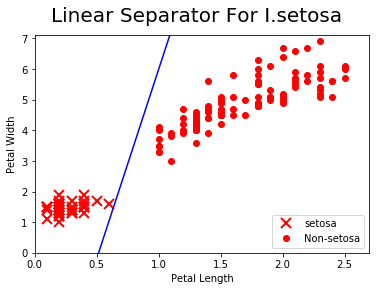

In [13]:
# Pull out slope/intercept
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)

# Create fitted line
x = np.linspace(0, 3, num=50)
ablineValues = []
for i in x:
  ablineValues.append(slope*i+intercept)

# Plot the fitted line over the data
setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()

In [ ]:
sess.close()